In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# reading in the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [9]:
# build vocab
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0;
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [68]:
# build the dataset

def build_dataset(words):
    block_size = 3;
    X,Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [11]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [16]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [12]:
C = torch.randn((27,2))
C

tensor([[ 0.1933,  1.9824],
        [-1.1393,  1.1662],
        [ 0.9100,  1.1895],
        [ 0.3230,  0.3048],
        [-0.8455,  1.0924],
        [-0.5701, -1.5412],
        [-1.3642, -0.6496],
        [ 0.2640,  1.1313],
        [-0.3216,  0.6918],
        [-0.2278,  0.3552],
        [-0.9097, -2.3213],
        [ 0.6282,  1.0546],
        [-1.2729, -0.4620],
        [ 2.5244, -0.2587],
        [ 0.3913,  0.8923],
        [-0.9704,  1.4166],
        [ 1.7370,  1.0971],
        [-1.1941, -0.9320],
        [-1.0386,  0.8338],
        [-0.8172, -1.4492],
        [ 0.1867,  0.9787],
        [ 0.9969,  1.6096],
        [ 0.6545, -0.1170],
        [ 0.8443,  2.0073],
        [-0.9563, -0.3993],
        [-0.1981, -0.1801],
        [ 0.9978,  1.3840]])

In [19]:
C[5]

tensor([ 0.8253, -0.3088])

In [62]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
h.shape 

torch.Size([32, 100])

In [63]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [65]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [70]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
prob[0].sum()

tensor(1.0000)

In [76]:
torch.arange(32)
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.2144)

In [95]:
# --- doing it again ----
X.shape, Y.shape 

(torch.Size([228146, 3]), torch.Size([228146]))

In [58]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [59]:
sum(p.nelement() for p in parameters)

11897

In [62]:
lri = []
lossi = []
stepi = []

In [65]:
for  p in parameters:
    p.requires_grad = True

lr = 0.05;
for i in range(50000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    
    # zero grad
    for p in parameters:
        p.grad = None
    # backprop
    loss.backward()
    
    # update params
    # lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())

1.8940110206604004


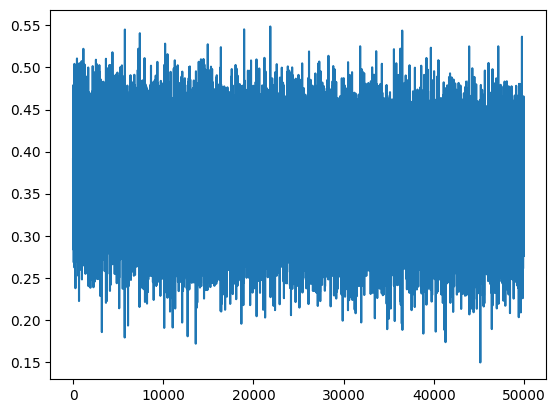

In [64]:
plt.plot(stepi, lossi)

In [52]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3374, grad_fn=<NllLossBackward0>)

In [53]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3455, grad_fn=<NllLossBackward0>)

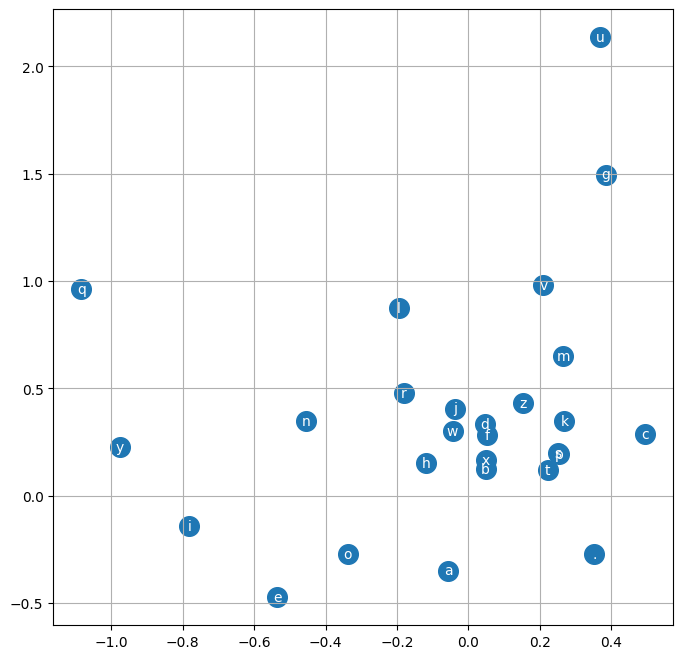

In [54]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:,1].data, s = 200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

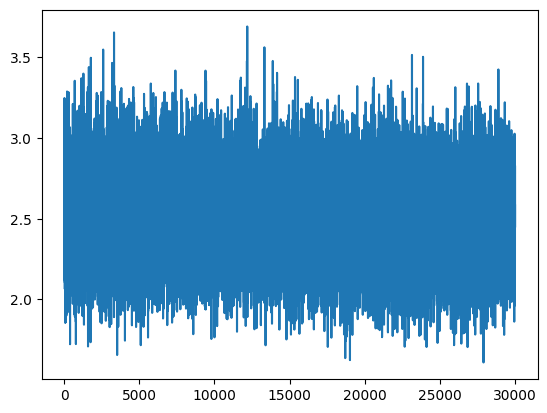

In [48]:
plt.plot(stepi, lossi)

In [ ]:
# training split - 80%
# dev/validation split - 10%
# test split - 10%
# scale up the size of the neural net? make performance improvements

In [49]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4458, grad_fn=<NllLossBackward0>)

In [67]:
# sample from the model now
g = torch.Generator().manual_seed(2147483647 + 10)
for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

carlah.
aal.
harli.
jalex.
taty.
halaysie.
raheel.
amerric.
areei.
arleniah.
maiiv.
asley.
pha.
marian.
quintza.
lilea.
jadli.
wazelo.
dearynix.
kaellissa.
